In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [2]:
car_data = pd.read_csv('E:\mini_project\Car Price Prediction\cardata.csv')
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
car_data.shape

(301, 9)

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
def cateorical_distribution(collumn):
    return car_data[collumn].value_counts()

In [14]:
cateorical_distribution('Fuel_Type')

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [15]:
cateorical_distribution('Seller_Type')

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [16]:
cateorical_distribution('Transmission')

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

Encoding the Categorical Data

In [17]:
# Encoding Fuel_Type Collumn
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

# Encoding Seller_Type Collumn
car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

# Encoding Transmission Collumn
car_data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_10792\1642863209.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_10792\1642863209.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_10792\1642863209.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a f

In [18]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


Splitting the Data became Features & Target data

In [19]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_data['Selling_Price']

In [20]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [21]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting data into Training Data & Testing Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

Model Training with Linear Regression

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [24]:
# prediction on Training Data
training_data_pred = model.predict(X_train)

In [25]:
# R-squared Error
error_score = metrics.r2_score(y_train, training_data_pred)
print(f"R-squared Error : {error_score}")

R-squared Error : 0.8799451660493708


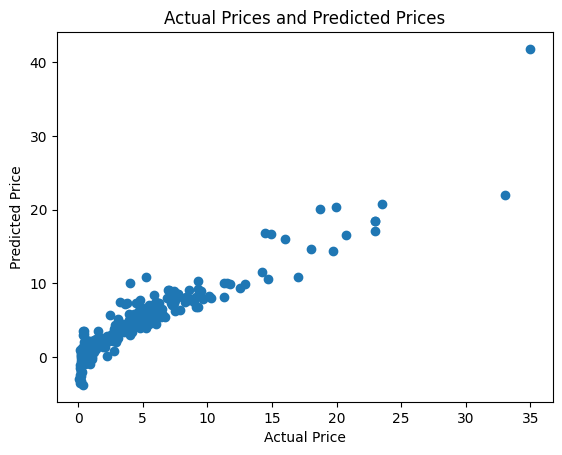

In [26]:
# Visualize the Actual Prices and Predicted Prices
plt.scatter(y_train, training_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices and Predicted Prices')
plt.show()

In [28]:
# prediction on Testing Data
test_data_pred = model.predict(X_test)

In [29]:
# R-squared Error
error_test_score = metrics.r2_score(y_test, test_data_pred)
print(f"R-squared Error : {error_test_score}")

R-squared Error : 0.8365766715026374


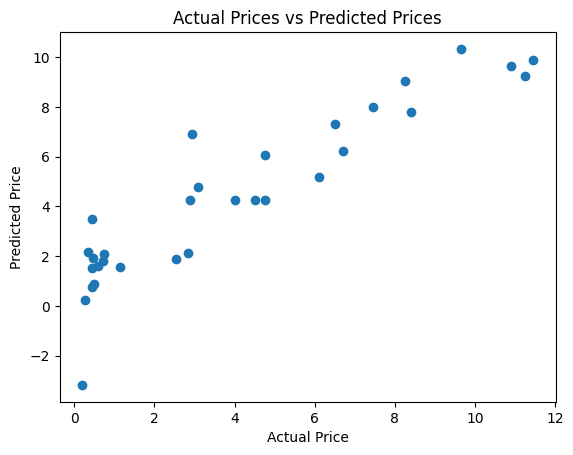

In [30]:
# Visualize Actual Prices and Predicted Prices 
plt.scatter(y_test, test_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Model Training with Lasso Regression

In [33]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

Model Evaluation

In [34]:
# prediction on Training Data
lasso_training_data_pred = lasso_model.predict(X_train)

In [35]:
# R-squared Error
lasso_error_score = metrics.r2_score(y_train, lasso_training_data_pred)
print(f"R-squared Error : {lasso_error_score}")

R-squared Error : 0.8427856123435794


Visualize Data

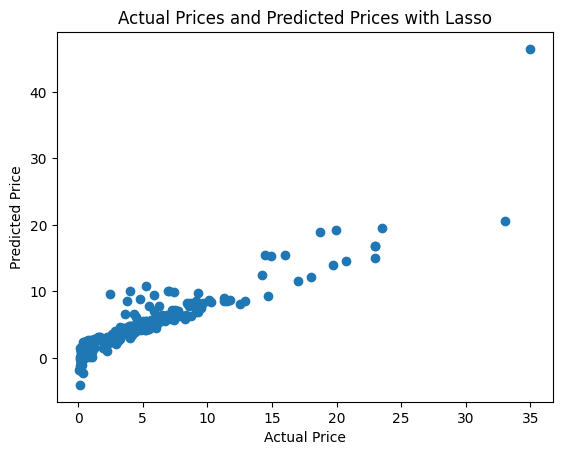

In [36]:
# Visualize the Actual Prices and Predicted Prices
plt.scatter(y_train, lasso_training_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices and Predicted Prices with Lasso')
plt.show()

In [37]:
# Prediction on Testing Data
lasso_test_data_pred = lasso_model.predict(X_test)

In [38]:
# R-squared Error
lasso_error_test_score = metrics.r2_score(y_test, lasso_test_data_pred)
print(f"R-squared Error : {lasso_error_test_score}")

R-squared Error : 0.8709167941173195


Visualize Data

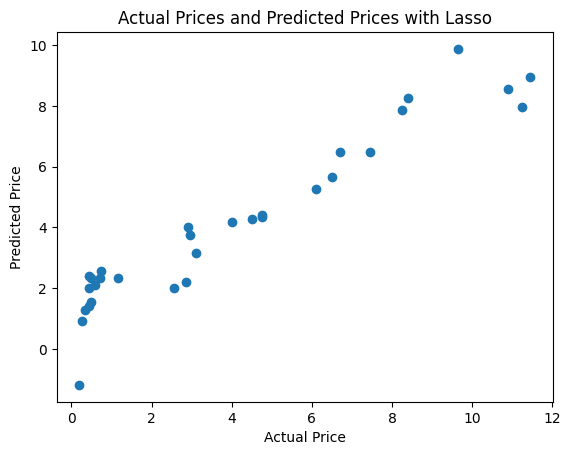

In [39]:
# Visualize the Actual Prices and Predicted Prices
plt.scatter(y_test, lasso_test_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices and Predicted Prices with Lasso')
plt.show()

Make a Predictive System

In [59]:
import numpy as np

input_data = (2016,8.89,20273,1,0,0,0)

input_data_as_np_array = np.asarray(input_data)

input_data_reshaped = input_data_as_np_array.reshape(1, -1)

prediction = lasso_model.predict(input_data_reshaped)

print(f"Car Price : {prediction[0]}")

Car Price : 6.237820928516044


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
